In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
df=pd.read_csv('cars.csv')

In [3]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,1,781997,881997,10,72310,2,2,16,186,58,194,461803,6
1,2,553464,643464,9,72189,5,6,6,173,81,189,273747,14
2,3,1175130,1275130,10,74100,5,4,14,184,104,95,852711,11
3,4,884824,924824,4,34340,1,7,20,183,125,122,701224,11
4,5,412866,462866,5,48050,1,1,10,189,89,114,213995,3


In [5]:
df.tail()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
1995,1996,1155546,1235546,8,66920,3,4,14,149,66,156,907707,9
1996,1997,715901,755901,4,39692,3,1,17,141,86,199,527301,6
1997,1998,1147919,1247919,10,79010,4,10,7,179,102,138,820205,15
1998,1999,873650,903650,3,26190,1,9,19,188,93,127,698817,13
1999,2000,755730,825730,7,67697,2,8,19,158,57,98,522826,12


In [ ]:
#Before going on to prediction lets do some exploratory data analysis on the given data

In [6]:
df.shape

(2000, 13)

In [59]:
df.dtypes

v.id            int64
on road old     int64
on road now     int64
years           int64
km              int64
rating          int64
condition       int64
economy         int64
top speed       int64
hp              int64
torque          int64
buying price    int64
profit          int64
dtype: object

In [18]:
df.isnull().sum()

on road old     0
on road now     0
years           0
km              0
rating          0
condition       0
economy         0
top speed       0
hp              0
torque          0
buying price    0
profit          0
dtype: int64

In [8]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
count,2000.000000,2.000000e+03,2.000000e+03,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,1000.500000,7.443762e+05,7.997562e+05,5.53800,46927.863500,2.964000,5.466000,12.967500,170.096000,95.464000,138.394000,5.267934e+05,10.464500
std,577.494589,2.598077e+05,2.625879e+05,2.86874,25014.291766,1.429239,2.926453,4.388288,17.388904,26.237834,35.151039,2.637678e+05,3.403606
min,1.000000,3.009920e+05,3.120410e+05,1.00000,7023.000000,1.000000,1.000000,6.000000,140.000000,50.000000,80.000000,-3.412700e+04,3.000000
25%,500.750000,5.223752e+05,5.786305e+05,3.00000,25732.500000,2.000000,3.000000,9.000000,155.000000,73.000000,107.000000,3.049825e+05,8.000000
50%,1000.500000,7.405895e+05,7.908985e+05,6.00000,46088.000000,3.000000,5.500000,13.000000,170.000000,95.000000,138.000000,5.286965e+05,10.000000
75%,1500.250000,9.688300e+05,1.030006e+06,8.00000,67825.500000,4.000000,8.000000,17.000000,185.000000,118.000000,168.000000,7.507372e+05,13.000000
max,2000.000000,1.199860e+06,1.294968e+06,10.00000,99970.000000,5.000000,10.000000,20.000000,200.000000,140.000000,200.000000,1.032874e+06,18.000000


In [87]:
#we can drop vechile id as it not affects the model
df=df.drop(['v.id'],axis=1)

Correlation with Heatmap:
A correlation heatmap uses colored cells,typically monochromatic scale,to show 2D correlation matrix(table) between two discrete dimensions or event types.It is very important in feature selection

In [10]:
df.corr()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
on road old,1.000000,0.994025,0.042225,0.039116,-0.009947,-0.026666,0.004539,0.005348,-0.006346,0.023712,0.978563,-0.025578
on road now,0.994025,1.000000,0.151026,0.145399,-0.010672,-0.027682,0.000185,0.004683,-0.010006,0.025672,0.951484,-0.027299
years,0.042225,0.151026,1.000000,0.976649,-0.007597,-0.011883,-0.039421,-0.005569,-0.034116,0.020236,-0.153028,-0.018229
km,0.039116,0.145399,0.976649,1.000000,-0.008637,-0.015013,-0.029506,0.000172,-0.025601,0.017289,-0.155314,-0.022000
rating,-0.009947,-0.010672,-0.007597,-0.008637,1.000000,0.030684,-0.039349,0.019523,0.017134,0.025873,-0.010221,0.440901
condition,-0.026666,-0.027682,-0.011883,-0.015013,0.030684,1.000000,-0.049694,-0.018732,0.000375,-0.028912,-0.023458,0.877860
economy,0.004539,0.000185,-0.039421,-0.029506,-0.039349,-0.049694,1.000000,-0.071010,0.031179,0.011914,0.009348,-0.057233
top speed,0.005348,0.004683,-0.005569,0.000172,0.019523,-0.018732,-0.071010,1.000000,0.010404,-0.008773,0.005980,-0.003898
hp,-0.006346,-0.010006,-0.034116,-0.025601,0.017134,0.000375,0.031179,0.010404,1.000000,0.009978,-0.002899,0.009248
torque,0.023712,0.025672,0.020236,0.017289,0.025873,-0.028912,0.011914,-0.008773,0.009978,1.000000,0.016909,-0.021057


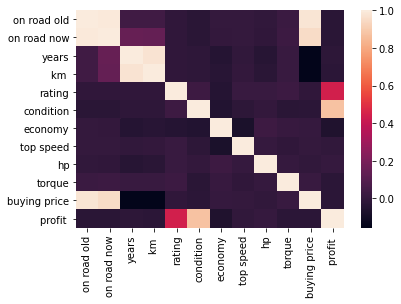

In [12]:
sns.heatmap(df.corr())

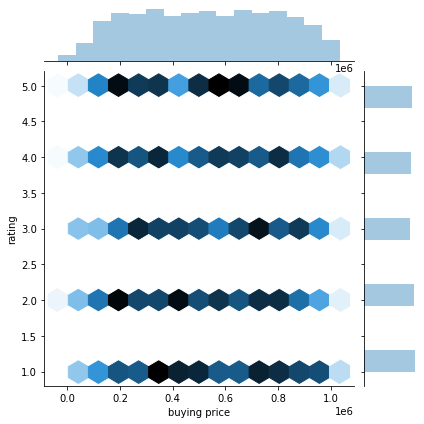

In [13]:
sns.jointplot(x='buying price',y='rating',data=df,kind='hex')

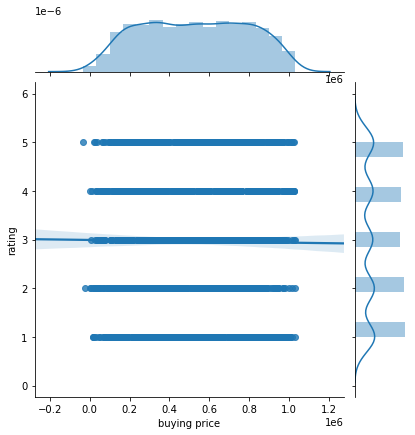

In [14]:
sns.jointplot(x='buying price',y='rating',data=df,kind='reg')

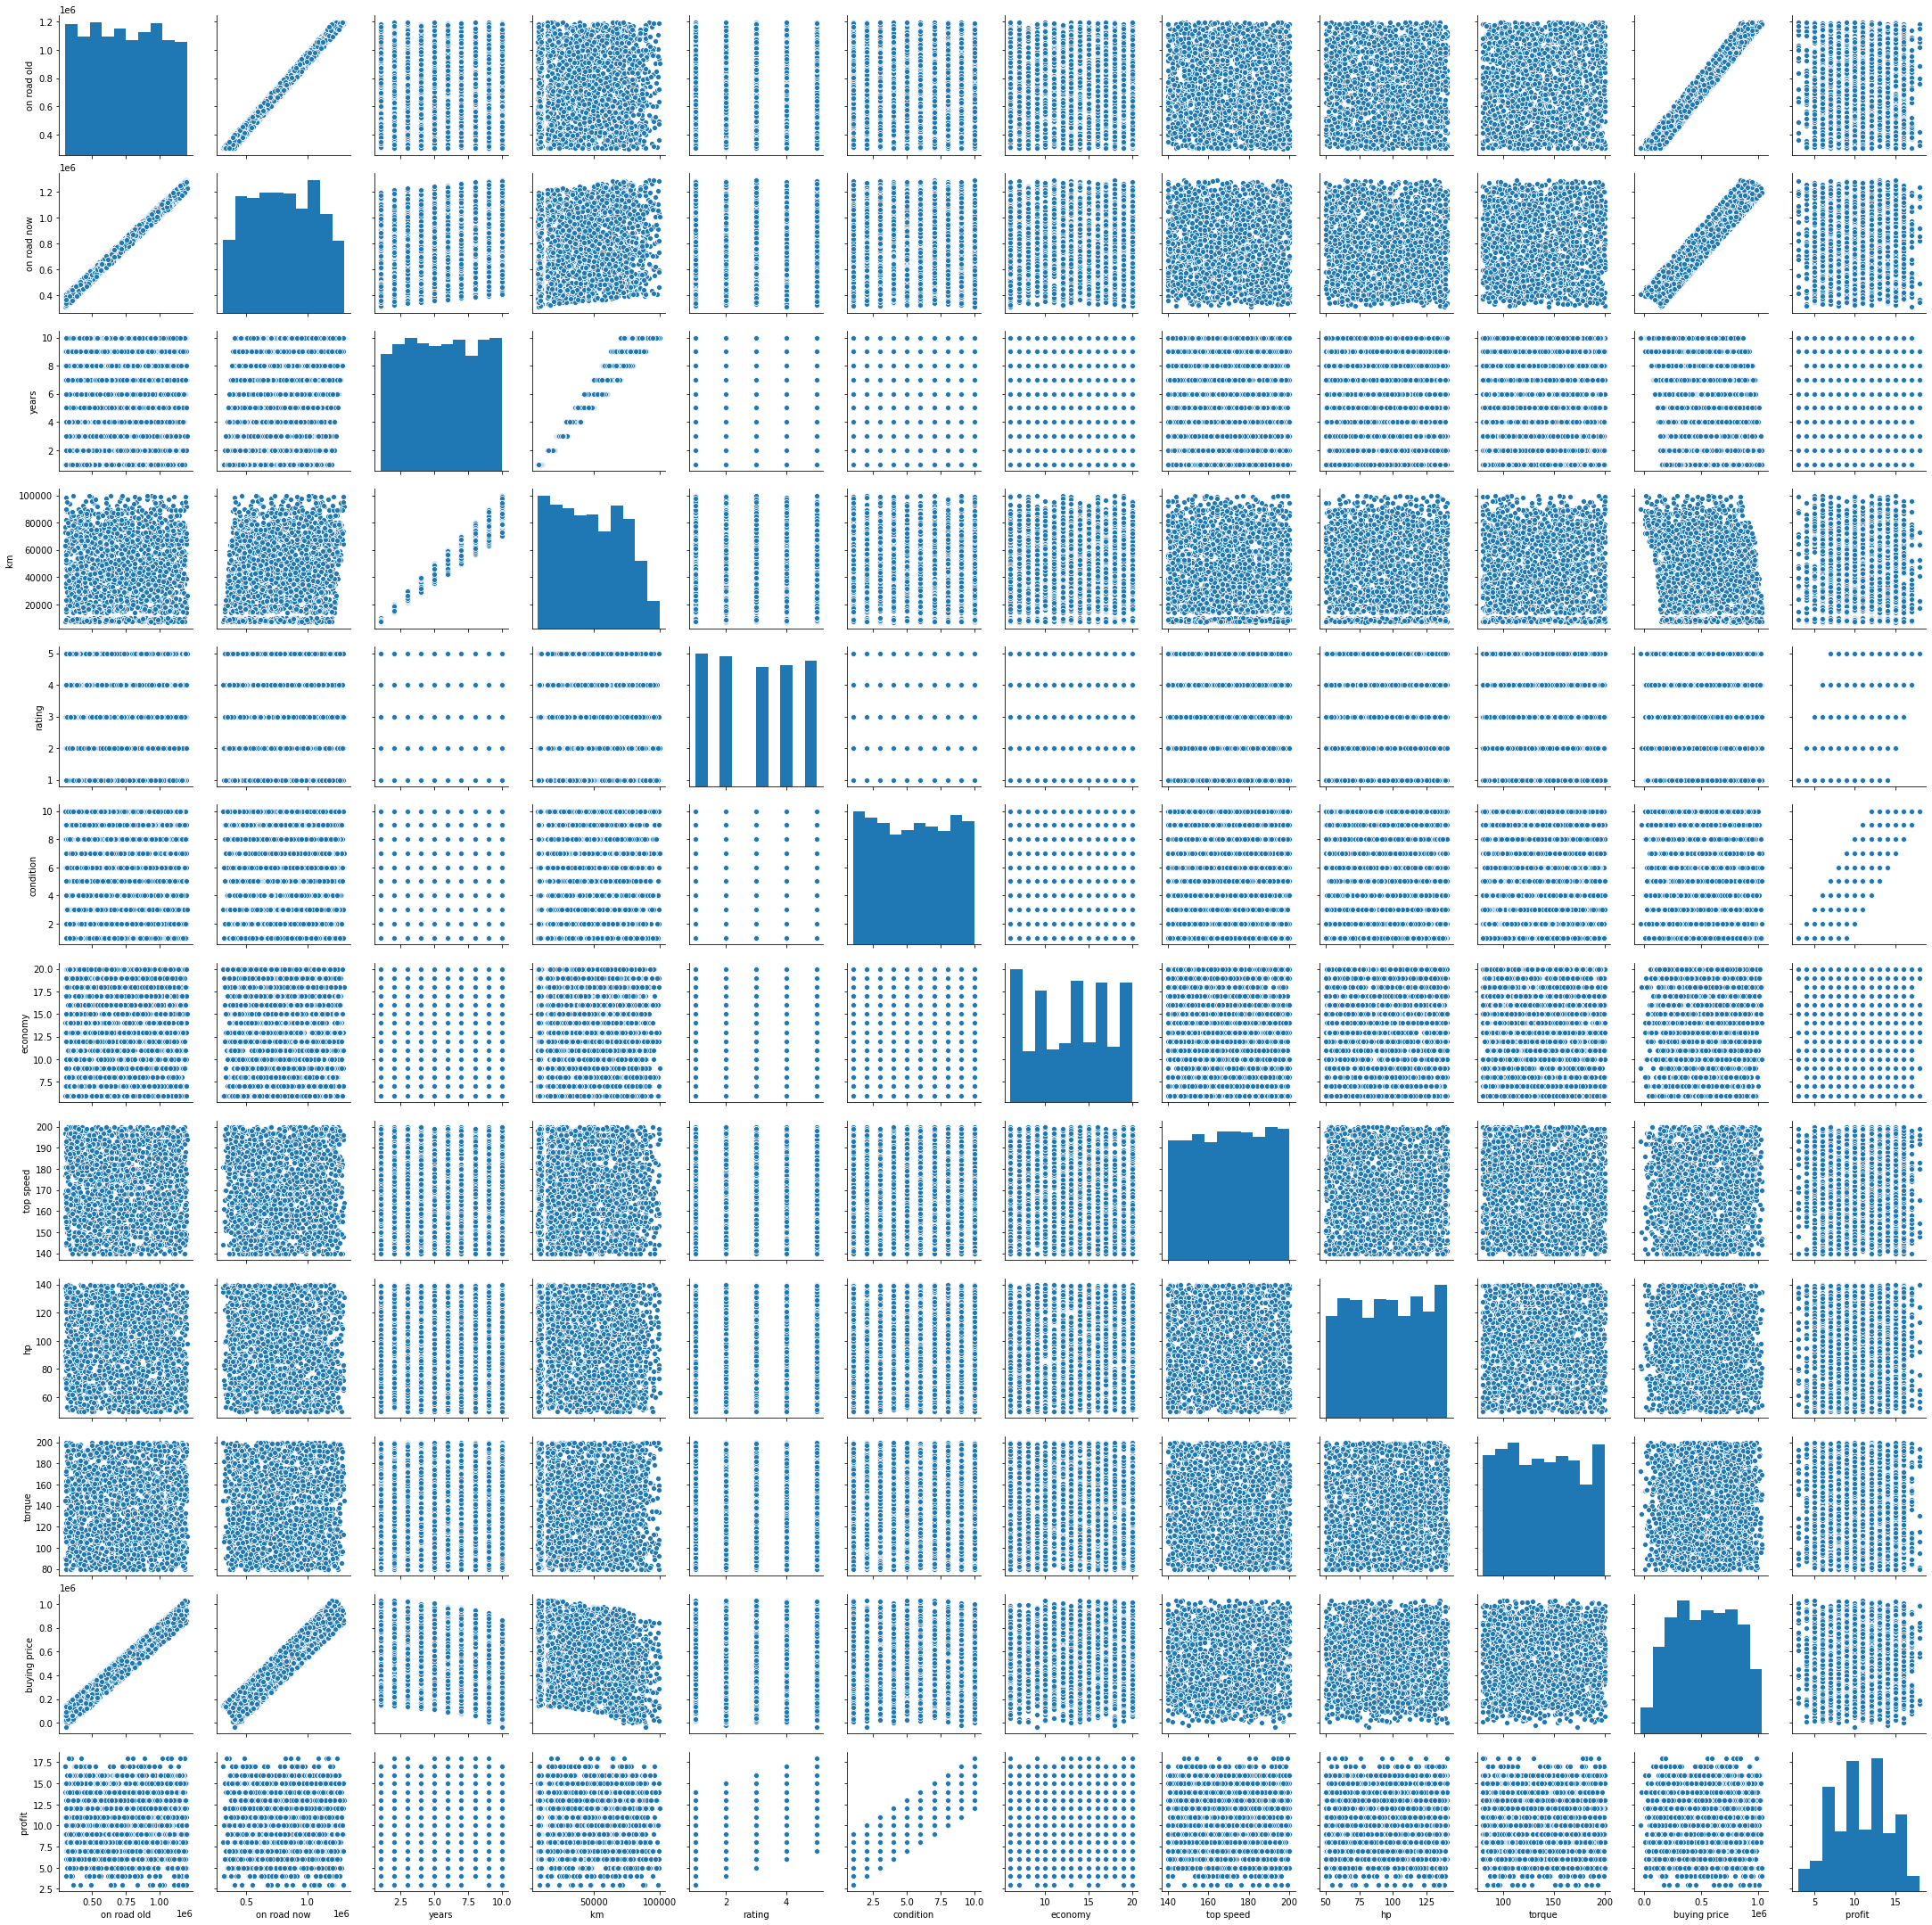

In [15]:
sns.pairplot(df)

In [88]:
discrete_features=[feature for feature in df.columns if((len(df[feature].unique())<25))]
len(discrete_features)

5

In [61]:
discrete_features

['years', 'rating', 'condition', 'economy', 'profit ']

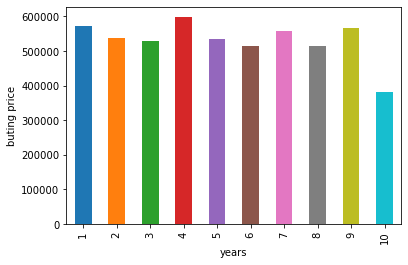

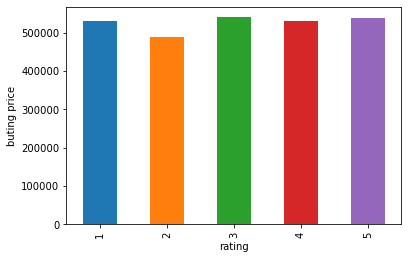

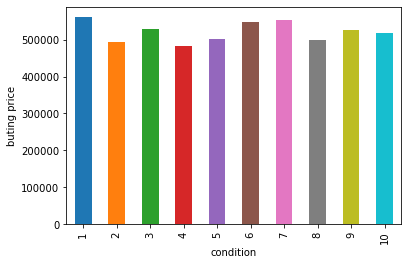

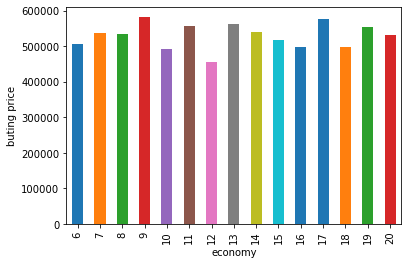

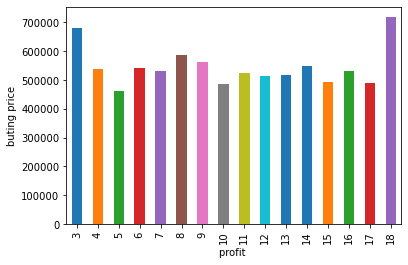

In [62]:
for ft in discrete_features:
    df.groupby(ft)['buying price'].median().plot.bar()
    plt.xlabel(ft)
    plt.ylabel('buting price')
    plt.show()

In [89]:
continuous_features=[features for features in df.columns if features not in discrete_features]
continuous_features

['on road old',
 'on road now',
 'km ',
 'top speed',
 'hp',
 'torque',
 'buying price']

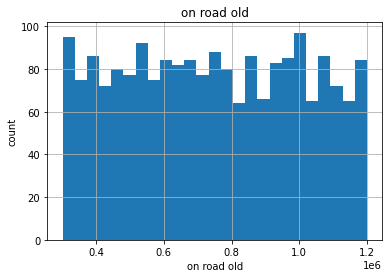

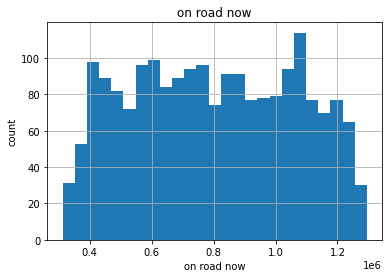

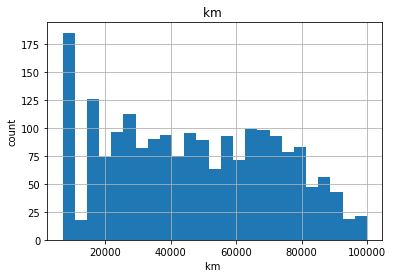

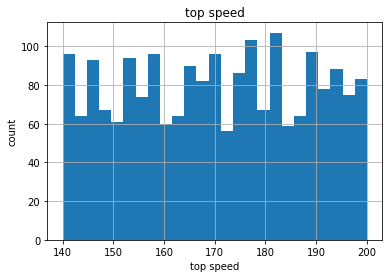

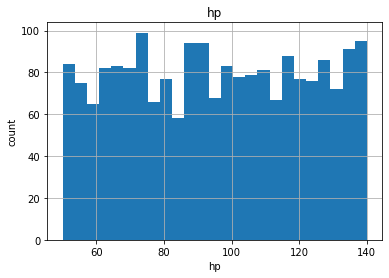

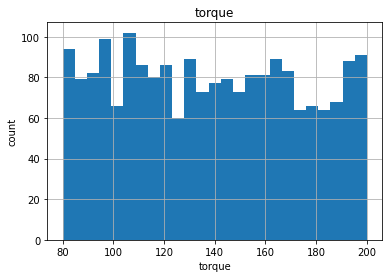

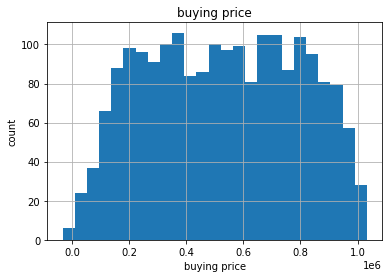

In [90]:
##now lets see the distribution of the continuous variables
for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    

C:\Users\sai lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


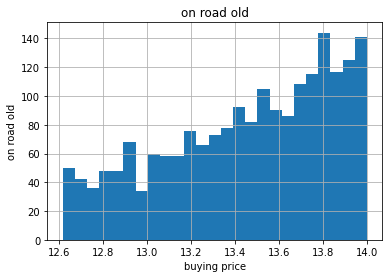

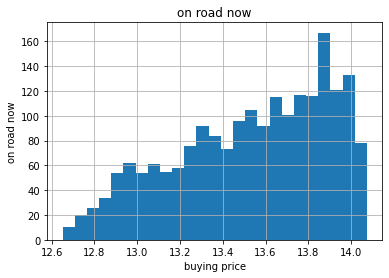

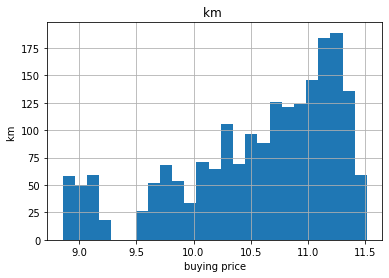

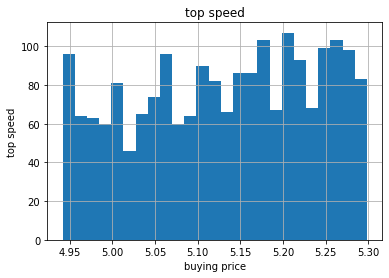

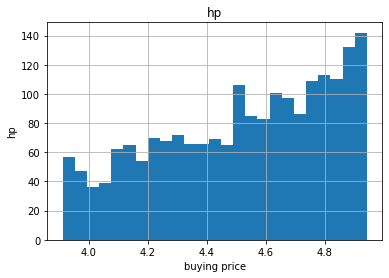

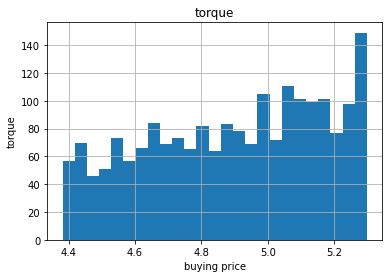

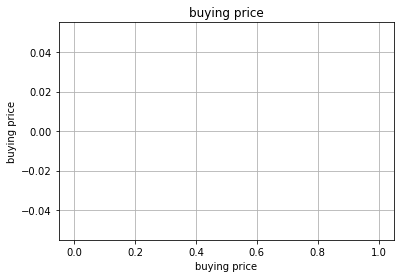

In [93]:
data=df.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['buying price']=np.log(data['buying price'])
        data[feature].hist(bins=25)
        plt.xlabel('buying price')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

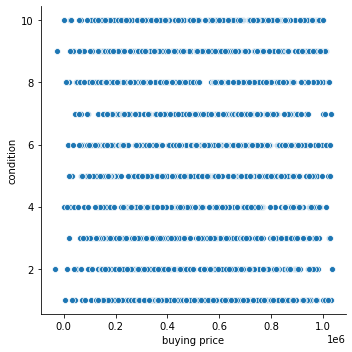

In [246]:
sns.relplot(x='buying price',y='condition',data=df)

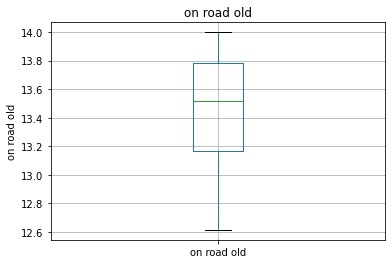

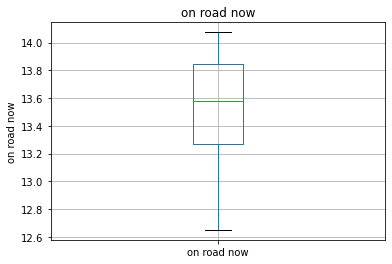

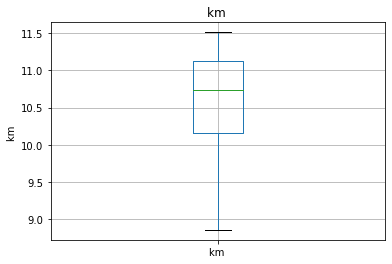

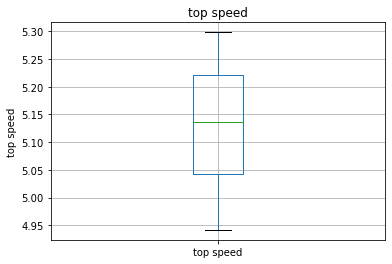

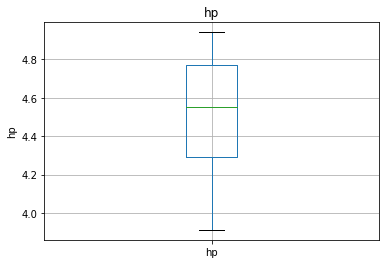

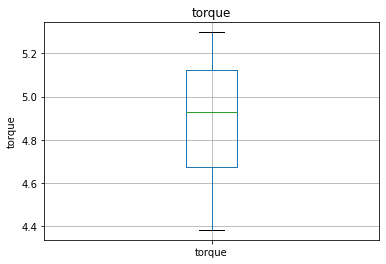

C:\Users\sai lokesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


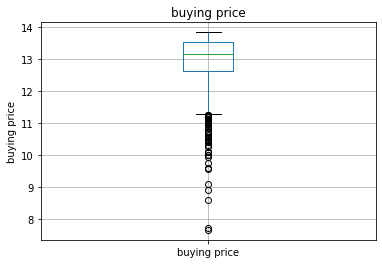

In [66]:
#checking if there are any outliers

for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


No outliers

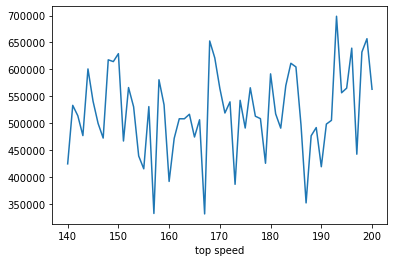

In [216]:
df.groupby('top speed')['buying price'].median().plot(kind='line')

In [98]:
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,buying price,profit
0,781997,881997,10,72310,2,2,16,186,58,194,461803,6
1,553464,643464,9,72189,5,6,6,173,81,189,273747,14
2,1175130,1275130,10,74100,5,4,14,184,104,95,852711,11
3,884824,924824,4,34340,1,7,20,183,125,122,701224,11
4,412866,462866,5,48050,1,1,10,189,89,114,213995,3


In [28]:
x=df.iloc[:,:-2].values
y=df.iloc[:,-2].values

In [102]:
y

array([461803, 273747, 852711, ..., 820205, 698817, 522826], dtype=int64)

STANDARD SCALER

 It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. 
It is more useful in classification than regression
Standardization is useful for data which has negative value.It arranges the data in a standard normal distribution.
In short, it standardizes the data

In [29]:
from sklearn.preprocessing import StandardScaler
p=StandardScaler()
x=p.fit_transform(x)

C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [310]:
x[0]

array([ 0.14483863,  0.31327163,  1.55577552,  1.01495915, -0.67465329,
       -1.18466521,  0.69121679,  0.91483499, -1.42821888,  1.58231187])

In [311]:
x

array([[ 0.14483863,  0.31327163,  1.55577552, ...,  0.91483499,
        -1.42821888,  1.58231187],
       [-0.73500509, -0.59534843,  1.20710329, ...,  0.16704482,
        -0.55140289,  1.44003299],
       [ 1.65838635,  1.81079412,  1.55577552, ...,  0.79979035,
         0.3254131 , -1.23480994],
       ...,
       [ 1.55362499,  1.70714196,  1.55577552, ...,  0.51217874,
         0.24916823, -0.01121158],
       [ 0.49769934,  0.39575225, -0.88493014, ...,  1.02987963,
        -0.09393368, -0.32422511],
       [ 0.04371164,  0.09893934,  0.50975881, ..., -0.69578999,
        -1.46634132, -1.14944261]])

LINEAR REGRESSION:

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

RANDOM FOREST REGRESSION:
    

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
A random forest is a meta-estimator (i.e. it combines the result of multiple predictions) which aggregates many decision trees, with some helpful modifications:

In [30]:
from sklearn.ensemble import RandomForestRegressor
g=RandomForestRegressor(n_estimators=10,random_state=0)
g.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

DECISION TREE:

It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problem

In [31]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

PRINCIPLE COMPONENT ANALYSIS(PCA):

PCA is a dimensionality reduction algorithm.This algorithm fastly learns the correlations between the features using covariance magtrix,eigon vectors and eigon values and reduces the features to given number of features.This is very hlepful in data visualization.when features are too many it is very hard to visualize the whole data.Thats where PCA comes in very handy.

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)

In [39]:
from xgboost import XGBRegressor
reg2=XGBRegressor()
reg2.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [36]:
lin_reg.predict(x)

array([495095.18371166, 276638.53088738, 887345.606578  , ...,
       856398.82515113, 701296.05852121, 506305.66572753])

In [32]:
g.predict(x)

array([460512.5, 274522.6, 852180.4, ..., 820861.6, 696658.7, 531019.1])

In [33]:
reg.predict(x)

array([461803., 273747., 852711., ..., 820205., 698817., 522826.])

In [40]:
reg2.predict(x)

array([478070.72, 270459.38, 853216.6 , ..., 821674.7 , 695341.56,
       526568.25], dtype=float32)

K-fold Cross Validation

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point.
Lets take the scenario of 5-Fold cross validation(K=5). 
Here, the data set is split into 5 folds. In the first iteration, 
the first fold is used to test the model and the rest are used to train the model. 
In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set.
This process is repeated until each fold of the 5 folds have been used as the testing set.


In [37]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=lin_reg,X=x,y=y,cv=10)
print(acc.mean()*100)

99.56788334618119


In [107]:
##K fold cross validation(RANDOM FOREST REGRESSION)
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=g,X=x,y=y,cv=10)
print(acc.mean()*100)

99.88266063715126


In [255]:
##K fold cross validation(DECISION TREE REGRESSION)
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=reg,X=x,y=y,cv=10)
print(acc.mean()*100)

99.28892804910326


In [41]:
##K fold cross validation(APPLYING PCA and XGBOOST)
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=reg2,X=x,y=y,cv=10)
print(acc.mean()*100)

99.51021981415809


RANDOM FOREST REGRESSION GOT HIGH ACCURACY

NOW WE HAVE DONE THE TRAINING THE DATA USING THREE DIFFERENT ALGORITHMS NOW LETS APPLY THOSE ALGORITHMS ON TEST DATA AND CHECK
THE RESULTS

In [43]:
df2=pd.read_csv('test (1).csv')

In [44]:
df2.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,884463,934463,5,37235,1,10,6,152,115,156
1,2,358375,448375,9,71532,5,3,8,171,70,95
2,3,925561,955561,3,21276,2,10,11,188,67,118
3,4,1190067,1210067,2,17766,3,2,14,174,97,155
4,5,419517,479517,6,49626,5,2,14,192,91,184


In [45]:
v=df2['v.id']


In [46]:
df2=df2.drop(['v.id'],axis=1)

In [47]:
conv=df2.iloc[:,:].values

In [48]:
df2.isnull().sum()

on road old    0
on road now    0
years          0
km             0
rating         0
condition      0
economy        0
top speed      0
hp             0
torque         0
dtype: int64

In [49]:
df2.shape

(509, 10)

In [50]:
conv[0]

array([884463, 934463,      5,  37235,      1,     10,      6,    152,
          115,    156], dtype=int64)

In [51]:
from sklearn.preprocessing import StandardScaler
w=StandardScaler()
conv=w.fit_transform(conv)

C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
conv

array([[ 0.56501431,  0.53865825, -0.23279499, ..., -1.0163161 ,
         0.79924905,  0.35850022],
       [-1.44987667, -1.32088608,  1.15308393, ...,  0.05470853,
        -0.95663043, -1.37585212],
       [ 0.72241761,  0.61936929, -0.92573445, ...,  1.01299372,
        -1.07368906, -0.72191599],
       ...,
       [ 1.093513  ,  1.1813129 ,  0.8066142 , ..., -0.95994638,
        -0.29329818, -0.66505198],
       [-0.43009874, -0.57007222, -1.27220418, ...,  1.35121202,
        -0.72251317,  0.92714033],
       [ 0.0185723 , -0.1601743 , -1.61867391, ...,  0.78751485,
        -0.44937636,  0.61438827]])

In [294]:
conv[0]

array([ 0.56501431,  0.53865825, -0.23279499, -0.44646351, -1.50355128,
        1.57894607, -1.61540141, -1.0163161 ,  0.79924905,  0.35850022])

In [73]:
ran=[]

In [75]:
##by using random forest regression
for i in range(len(conv)):
    p=conv[i]
    y_pred=g.predict([p])
    ran.append(y_pred)
    print(y_pred)

[709612.3]
[85454.1]
[769261.]
[1024983.2]
[225533.7]
[253891.5]
[665427.9]
[857708.1]
[594667.1]
[431960.9]
[160886.5]
[878779.2]
[781260.1]
[767286.4]
[886436.9]
[924173.5]
[681379.1]
[140504.6]
[699675.]
[117754.4]
[317406.1]
[609633.2]
[403797.7]
[842392.7]
[173731.]
[267927.3]
[775879.]
[838060.3]
[121137.6]
[130200.4]
[320699.9]
[443818.1]
[183055.8]
[517640.6]
[843241.1]
[624738.1]
[313902.2]
[313062.6]
[491306.3]
[367609.2]
[711981.4]
[456250.9]
[557676.7]
[290538.3]
[698464.2]
[848276.9]
[860531.5]
[354210.8]
[487418.9]
[419530.9]
[267243.1]
[947683.6]
[184005.7]
[227112.4]
[127297.]
[333683.2]
[163688.]
[399726.2]
[605076.8]
[105527.7]
[437512.3]
[639296.6]
[441998.6]
[873844.6]
[511046.4]
[203843.3]
[870867.1]
[652007.2]
[574106.4]
[144480.9]
[344493.3]
[623728.1]
[850394.2]
[512696.4]
[320342.6]
[724641.7]
[374686.8]
[854273.4]
[576437.2]
[81225.4]
[782981.6]
[692953.2]
[742825.8]
[753434.]
[791209.5]
[924093.1]
[714692.8]
[329902.]
[334051.8]
[172086.8]
[200771.5]
[959148.

In [82]:
j=0
if(j<509):
    for i in range(len(ran)):
        print(ran[i][j])
    j=j+1

709612.3
85454.1
769261.0
1024983.2
225533.7
253891.5
665427.9
857708.1
594667.1
431960.9
160886.5
878779.2
781260.1
767286.4
886436.9
924173.5
681379.1
140504.6
699675.0
117754.4
317406.1
609633.2
403797.7
842392.7
173731.0
267927.3
775879.0
838060.3
121137.6
130200.4
320699.9
443818.1
183055.8
517640.6
843241.1
624738.1
313902.2
313062.6
491306.3
367609.2
711981.4
456250.9
557676.7
290538.3
698464.2
848276.9
860531.5
354210.8
487418.9
419530.9
267243.1
947683.6
184005.7
227112.4
127297.0
333683.2
163688.0
399726.2
605076.8
105527.7
437512.3
639296.6
441998.6
873844.6
511046.4
203843.3
870867.1
652007.2
574106.4
144480.9
344493.3
623728.1
850394.2
512696.4
320342.6
724641.7
374686.8
854273.4
576437.2
81225.4
782981.6
692953.2
742825.8
753434.0
791209.5
924093.1
714692.8
329902.0
334051.8
172086.8
200771.5
959148.8
980738.9
380875.3
397236.3
676339.5
848668.7
907980.5
955593.9
379826.5
714958.6
284831.5
97592.0
137252.5
186105.7
68085.3
334619.0
719476.1
692922.7
922695.2
857069.0
3176

In [56]:
##for decison tree regression
y_pred1=reg.predict(conv)
y_pred1

array([ 708684.,   88322.,  780505., 1028717.,  234846.,  249532.,
        657963.,  873120.,  544592.,  453309.,  160386.,  876342.,
        784530.,  787410.,  899455.,  922119.,  677860.,  148009.,
        696117.,  127215.,  319723.,  620587.,  394303.,  856427.,
        147234.,  258190.,  783742.,  838954.,  127215.,  128923.,
        344018.,  438981.,  179946.,  525782.,  853351.,  631570.,
        324206.,  301665.,  486282.,  352051.,  715523.,  461803.,
        583924.,  311744.,  715324.,  847461.,  854646.,  356670.,
        463585.,  411945.,  255561.,  947056.,  161935.,  220243.,
        126383.,  314939.,  162607.,  396733.,  599909.,  108265.,
        456647.,  636030.,  443265.,  876583.,  507584.,  201935.,
        899455.,  649610.,  575137.,  134178.,  337621.,  608932.,
        864898.,  532029.,  320680.,  714794.,  376621.,  844120.,
        582350.,   85900.,  784833.,  703011.,  751779.,  745909.,
        806495.,  926092.,  696981.,  341173.,  341173.,  1712

In [57]:
##for linear regression
lin_reg.predict(conv)

array([ 692011.64962751,   95118.59715857,  768591.23675658,
       1044514.51879794,  203186.53477954,  240951.74080038,
        694119.74398838,  851197.81382351,  608238.9215266 ,
        413425.87182639,  142541.55770379,  853701.66832348,
        784518.72019329,  782589.88587952,  873572.7167082 ,
        901178.19260422,  696520.9947507 ,  120396.38151568,
        685285.78558432,  148663.66532344,  311671.49643742,
        591019.55403203,  401228.33923129,  826771.3935046 ,
        137753.74027952,  309488.54976867,  795788.93799797,
        827106.31427565,  154499.2951042 ,   86463.47396221,
        336289.95344383,  426461.81734344,  191865.10559046,
        546578.3712282 ,  884373.36290522,  655315.24784497,
        311878.2229632 ,  300793.33112376,  490908.67186624,
        368182.3169257 ,  721830.23032306,  484318.97382311,
        542631.86662428,  282481.47059881,  708781.41710925,
        878548.35158732,  857553.99733134,  384807.31221217,
        517991.87768698,

In [94]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
conv=pca.fit_transform(conv)

In [95]:
#using PCA nad XGBOOST
reg2.predict(conv)

array([582461.   , 268432.56 , 723376.6  , 695133.1  , 595555.7  ,
       405630.97 , 915913.6  , 180429.45 , 164605.61 , 555052.44 ,
       684837.75 , 429134.4  , 231248.55 , 141690.92 , 472039.6  ,
       418869.06 , 851727.4  , 670867.56 , 345720.38 , 133489.22 ,
       352244.62 , 435536.56 , 839722.44 , 388506.16 , 499094.44 ,
       208762.72 , 914916.7  , 544086.   , 136626.12 , 527087.3  ,
       921786.94 , 672431.3  , 910509.75 , 956066.7  , 129095.42 ,
       937219.44 , 248130.28 , 383396.84 , 801512.25 , 246193.75 ,
       868294.2  , 123716.41 , 255458.16 , 329964.7  , 165909.89 ,
       887668.1  , 304408.62 , 975693.   ,  82899.76 , 713468.44 ,
       197374.36 , 762152.06 , 564273.56 , 583178.56 , 744942.44 ,
       634065.06 , 431093.2  , 630589.56 , 520325.7  , 302208.97 ,
       312062.9  , 351780.2  , 953524.5  , 168380.12 , 809067.2  ,
       876114.1  , 391805.75 , 605490.6  , 632844.4  , 680512.06 ,
       972031.7  , 390551.25 , 589208.25 , 334128.56 , 455138.